In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [11]:
data = pd.read_csv('FIFA 2018 Statistics.csv', sep=",")
rows, columns = data.shape
print('rows = {}; cols = {};'.format(rows, columns))
data.head()

rows = 128; cols = 27;


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


<----------------------------------->
Обработка пропусков в числовых данных
<----------------------------------->

In [15]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / rows) * 100, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка 1st Goal. Тип данных float64. Количество пустых значений 34, 26.56%.
Колонка Own goals. Тип данных float64. Количество пустых значений 116, 90.62%.
Колонка Own goal Time. Тип данных float64. Количество пустых значений 116, 90.62%.


In [7]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,1st Goal,Own goals,Own goal Time
0,12.0,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,89.0,NaN,NaN
4,NaN,1.0,90.0
...,...,...,...
123,5.0,NaN,NaN
124,4.0,NaN,NaN
125,NaN,NaN,NaN
126,18.0,1.0,18.0


In [16]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['1st Goal'].isnull()].index
flt_index

Int64Index([  1,   2,   4,  12,  15,  16,  18,  23,  25,  35,  37,  38,  43,
             44,  47,  49,  62,  65,  72,  73,  74,  81,  82,  84,  88,  90,
             94, 105, 109, 112, 114, 116, 121, 125],
           dtype='int64')

In [17]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
12,16-06-2018,Peru,Denmark,0,52,18,6,7,5,3,...,1,0,0,No,NaN,Group Stage,No,0,NaN,NaN
15,17-06-2018,Nigeria,Croatia,0,46,14,2,5,7,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,32.0
16,17-06-2018,Costa Rica,Serbia,0,50,10,3,3,4,5,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
18,17-06-2018,Germany,Mexico,0,60,25,9,9,7,8,...,2,0,0,Yes,NaN,Group Stage,No,0,NaN,NaN
23,18-06-2018,Korea Republic,Sweden,0,48,5,0,2,3,5,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
25,18-06-2018,Panama,Belgium,0,39,6,2,4,0,3,...,5,0,0,No,NaN,Group Stage,No,0,NaN,NaN
35,20-06-2018,Morocco,Portugal,0,53,16,4,10,2,7,...,1,0,0,No,NaN,Group Stage,No,0,NaN,NaN


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [19]:
strategies=['mean', 'median','most_frequent']

In [21]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [22]:
test_num_impute_col(data, '1st Goal', strategies[0])

('1st Goal', 'mean', 34, 39.45744680851064, 39.45744680851064)

In [23]:
test_num_impute_col(data, 'Own goals', strategies[1])

('Own goals', 'median', 116, 1.0, 1.0)

In [24]:
test_num_impute_col(data, 'Own goal Time', strategies[2])

('Own goal Time', 'most_frequent', 116, 90.0, 90.0)

<----------------------------------------->
Обработка пропусков в категориальных данных
<----------------------------------------->

In [27]:
import requests
import io


url = "https://datahub.io/core/airport-codes/r/airport-codes.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')), error_bad_lines=False)
data

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"
...,...,...,...,...,...,...,...,...,...,...,...,...
56055,ZYYK,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,CN-21,Yingkou,ZYYK,YKH,NaN,"122.3586, 40.542524"
56056,ZYYY,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,CN-21,Shenyang,ZYYY,NaN,NaN,"123.49600219726562, 41.784400939941406"
56057,ZZ-0001,heliport,Sealand Helipad,40.0,EU,GB,GB-ENG,Sealand,NaN,NaN,NaN,"1.4825, 51.894444"
56058,ZZ-0002,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,TF-U-A,Grande Glorieuse,NaN,NaN,NaN,"47.296388888900005, -11.584277777799999"


In [29]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
rows, columns = data.shape
print('rows = {}; cols = {}'.format(rows, columns))
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / rows) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

rows = 56060; cols = 12
Колонка continent. Тип данных object. Количество пустых значений 28063, 50.06%.
Колонка iso_country. Тип данных object. Количество пустых значений 246, 0.44%.
Колонка municipality. Тип данных object. Количество пустых значений 5789, 10.33%.
Колонка gps_code. Тип данных object. Количество пустых значений 14989, 26.74%.
Колонка iata_code. Тип данных object. Количество пустых значений 46825, 83.53%.
Колонка local_code. Тип данных object. Количество пустых значений 26984, 48.13%.


In [30]:
# Импьютация наиболее частыми значениями
def impute_objects(column_to_impute):
    imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    data_imp2 = imp2.fit_transform(data[[column_to_impute]])
    return data_imp2

In [45]:
data_imp1 = impute_objects('continent')
np.unique(data_imp1)

array(['AF', 'AN', 'AS', 'EU', 'OC', 'SA'], dtype=object)

In [46]:
data_imp2 = impute_objects('municipality')
np.unique(data_imp2)

array(['"Big" Rock Flat', "'S Gravenvoeren", '108 Mile', ..., 'Å½atec',
       'Å½ilina', 'Å½ocene'], dtype=object)

In [47]:
data_imp3 = impute_objects('local_code')
np.unique(data_imp3)

array(['-', '00A', '00AA', ..., 'ZUN', 'ZWH', 'ZZV'], dtype=object)

<------------------------------------------------>
Преобразование категориальных признаков в числовые
<------------------------------------------------>

Кодирование категорий целочисленными значениями

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [48]:
cat_enc = pd.DataFrame({'c1':data_imp1.T[0]})
cat_enc

,c1
0,EU
1,EU
2,EU
3,EU
4,EU
...,...
56055,AS
56056,AS
56057,EU
56058,AF


In [49]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [50]:
cat_enc['c1'].unique()

array(['EU', 'OC', 'AF', 'AN', 'AS', 'SA'], dtype=object)

In [51]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5])

Кодирование категорий наборами бинарных значений - one-hot encoding

In [66]:
cat_enc3 = pd.DataFrame({'c3':data_imp3.T[0]})
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc3[['c3']])

In [67]:
cat_enc3.shape

(56060, 1)

In [68]:
cat_enc_ohe.shape

(56060, 27747)

In [69]:
cat_enc_ohe

<56060x27747 sparse matrix of type '<class 'numpy.float64'>'
	with 56060 stored elements in Compressed Sparse Row format>

In [70]:
cat_enc_ohe.todense()[0:10][0:10]

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
np.unique(cat_enc3)

array(['-', '00A', '00AA', ..., 'ZUN', 'ZWH', 'ZZV'], dtype=object)

Pandas get_dummies - быстрый вариант one-hot кодирования

In [72]:
cat_enc2 = pd.DataFrame({'c2':data_imp2.T[0]})
pd.get_dummies(cat_enc2).head()

,"c2_""Big"" Rock Flat",c2_'S Gravenvoeren,c2_108 Mile,c2_26Â°56â44.84âS 28Â°42â47.79âE,c2_3 Marias,"c2_;ifi,bwe",c2_<Olmos,c2_A. IbaÃ±ez,c2_Aachen,c2_Aalborg,...,c2_Å tip,c2_Å tÄtÃ­,c2_Å umperk,c2_Å umvald,c2_Å»ernica,c2_Å»Åobek,c2_Å½abljak Airport,c2_Å½atec,c2_Å½ilina,c2_Å½ocene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
pd.get_dummies(data[['municipality']], dummy_na=True).head()

,"municipality_""Big"" Rock Flat",municipality_'S Gravenvoeren,municipality_108 Mile,municipality_26Â°56â44.84âS 28Â°42â47.79âE,municipality_3 Marias,"municipality_;ifi,bwe",municipality_<Olmos,municipality_A. IbaÃ±ez,municipality_Aachen,municipality_Aalborg,...,municipality_Å tÄtÃ­,municipality_Å umperk,municipality_Å umvald,municipality_Å»ernica,municipality_Å»Åobek,municipality_Å½abljak Airport,municipality_Å½atec,municipality_Å½ilina,municipality_Å½ocene,municipality_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<-------------------->
Масштабирование данных
<-------------------->

In [75]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

MinMax масштабирование

In [82]:
data = pd.read_csv('FIFA 2018 Statistics.csv', sep=",")
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [83]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Ball Possession %']])

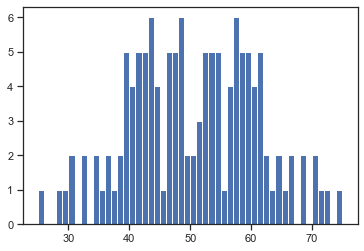

In [84]:
plt.hist(data['Ball Possession %'], 50)
plt.show()

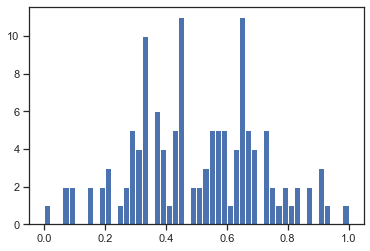

In [85]:
plt.hist(sc1_data, 50)
plt.show()

Масштабирование данных на основе Z-оценки - StandardScaler

In [86]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Attempts']])

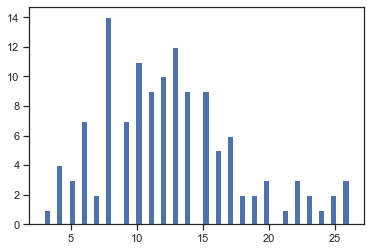

In [88]:
plt.hist(data['Attempts'], 50)
plt.show()

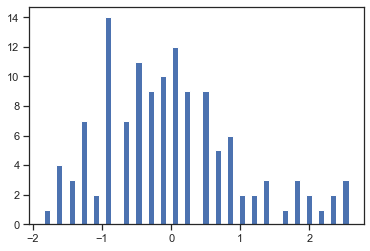

In [87]:
plt.hist(sc2_data, 50)
plt.show()

Нормализация данных

In [89]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Blocked']])

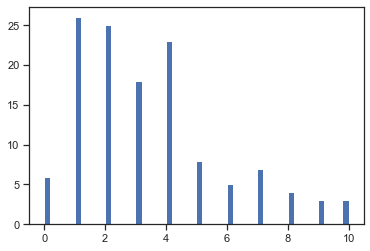

In [90]:
plt.hist(data['Blocked'], 50)
plt.show()

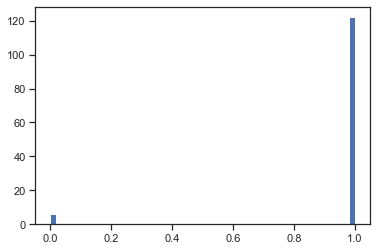

In [91]:
plt.hist(sc3_data, 50)
plt.show()